<a href="https://colab.research.google.com/github/shaestha/Web-scrapping-/blob/main/swiggy_webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/yauatcha-m-g-road-bangalore-281835"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food_Name","Price"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('div', class_="styles_itemName__hLfgz")
  price = item.find('div', class_="styles_itemPortionContainer__1u_tj")
  
  
  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)


<Response [200]>


In [155]:
df = pd.read_csv("food.csv")

In [156]:
df

,Unnamed: 0,Food_Name,Price
0,0,Asian Greens Soup - Veg,425
1,1,Sweet Corn Soup - Veg,360
2,2,Sweet Corn Soup - Chicken,395
3,3,Hot And Sour Soup - Veg,425
4,4,Hot And Sour Soup - Chicken,470
...,...,...,...
98,98,Chocolate Hazelnut Mousse Cake Half Kg,850
99,99,Chocolate Hazelnut Mousse,375
100,100,Pickled Vegetables,365
101,101,Chilli Garlic Sauce,365


In [138]:
df.shape

(103, 3)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  103 non-null    int64 
 1   Food_Name   103 non-null    object
 2   Price       103 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [140]:
df.describe()

,Unnamed: 0,Price
count,103.000000,103.000000
mean,51.000000,689.271845
std,29.877528,341.658590
min,0.000000,260.000000
25%,25.500000,470.000000
50%,51.000000,640.000000
75%,76.500000,787.500000
max,102.000000,2690.000000


In [141]:
df.isnull().sum()

Unnamed: 0    0
Food_Name     0
Price         0
dtype: int64

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

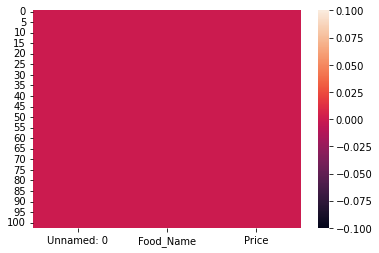

In [143]:
sns.heatmap(df.isnull())

In [144]:
x = df.Food_Name
y = df.Price

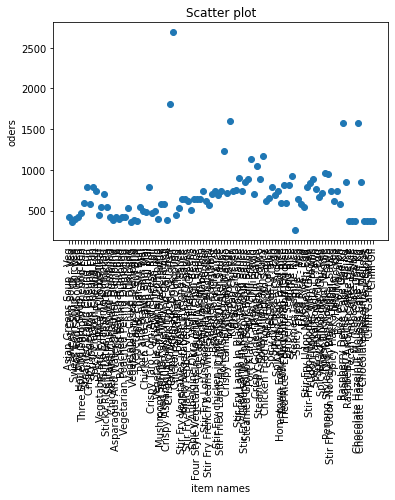

In [145]:
plt.scatter(x,y)
plt.title("Scatter plot")
plt.ylabel("oders")
plt.xticks(rotation='vertical')
plt.xlabel("item names")
plt.show()

In [146]:
import plotly.graph_objects as go

In [147]:
fig = go.Figure(
    data=[go.Bar(y = df.Price)],
    layout_title_text="Price rate"
)
fig.show()

In [148]:
import plotly.express as px
px.strip(df, x = 'Food_Name', y = 'Price', hover_name = 'Price')

From all the charts we can infer that the dish "chicken aromatic duck- half" has highest price of 2690 rupees.

In [149]:
px.histogram(df, x = "Food_Name", y = 'Price', hover_name = 'Price')

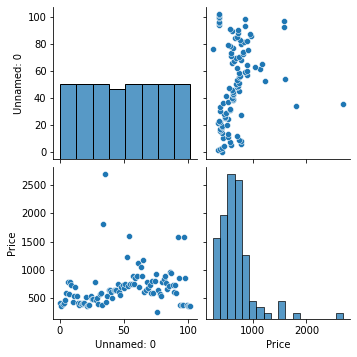

In [150]:
sns.pairplot(data = df)

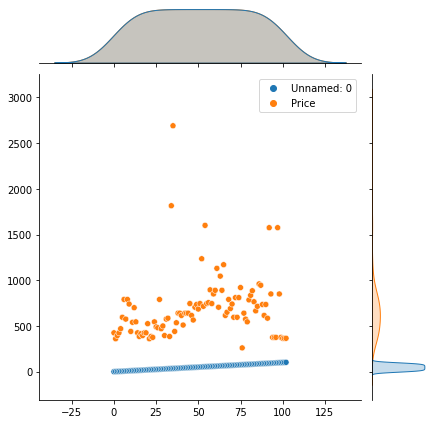

In [151]:
sns.jointplot(data = df)

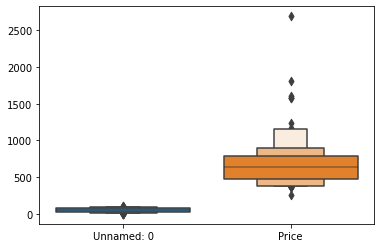

In [152]:
sns.boxenplot(data = df)

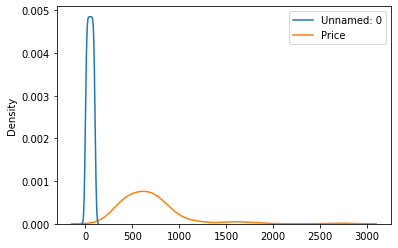

In [153]:
sns.kdeplot(data = df)

In [157]:
fig = go.Figure(data=[go.Scatter(
    x = df.Food_Name, y = df.Price,
    mode='markers',
    marker=dict(
            color='LightSkyBlue',
            line=dict(
                color='MediumPurple',
                width=2
            )
        ),
    marker_size=[40, 60, 80, 100])
])

fig.show()